In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("July Data.xlsx")
df.head()

,Sale_date,ds,Time,y
0,7/1/2019 10:02:22 AM,7/1/2019,10:02:22 AM,203.0004
1,7/1/2019 10:03:55 AM,7/1/2019,10:03:55 AM,1769.0008
2,7/1/2019 10:03:55 AM,7/1/2019,10:03:55 AM,1769.0008
3,7/1/2019 10:03:55 AM,7/1/2019,10:03:55 AM,1769.0008
4,7/1/2019 10:45:29 AM,7/1/2019,10:45:29 AM,754.0000


In [4]:
from fbprophet import Prophet
%matplotlib inline

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
df.info()

In [40]:
df['ds']=pd.to_datetime(df.ds)
df['Sale_date']=pd.to_datetime(df.Sale_date)


In [44]:
data=df[['ds','y']]

In [45]:
data= data.set_index('ds')

In [46]:
data.head()

,y
ds,
2019-07-01,203.0004
2019-07-01,1769.0008
2019-07-01,1769.0008
2019-07-01,1769.0008
2019-07-01,754.0000


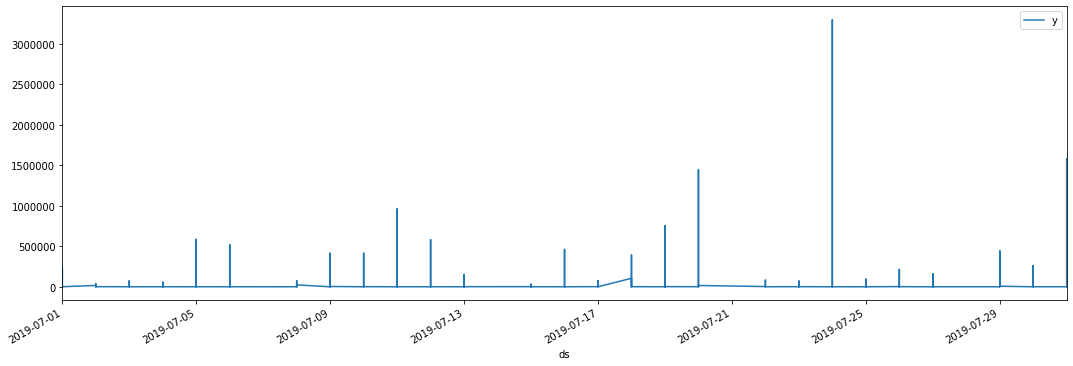

In [48]:
df['ds'] = pd.to_datetime(df['ds'])
df.plot(x='ds',y='y',figsize=(18,6))

In [50]:
df['ds']=pd.to_datetime(df.ds)
df['y']=pd.to_datetime(df.y)

In [51]:
len(df)

28673

In [52]:
len(df) - 597

28076

In [58]:
train = df.iloc[:28076]
test = df.iloc[28076:28673]

In [59]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
28083,2020-03-01,-138864.198569,-2.591183e+07,2.705228e+07,-2.597461e+07,2.711361e+07,-3055.263243,-3055.263243,-3055.263243,-3055.263243,-3055.263243,-3055.263243,0.0,0.0,0.0,-141919.461813
28084,2020-04-01,-159223.771758,-3.206076e+07,3.276888e+07,-3.196190e+07,3.277400e+07,2201.004161,2201.004161,2201.004161,2201.004161,2201.004161,2201.004161,0.0,0.0,0.0,-157022.767597
28085,2020-05-01,-178926.584522,-3.830020e+07,3.949623e+07,-3.826489e+07,3.952702e+07,2643.353756,2643.353756,2643.353756,2643.353756,2643.353756,2643.353756,0.0,0.0,0.0,-176283.230766
28086,2020-06-01,-199286.157711,-4.469286e+07,4.658763e+07,-4.463006e+07,4.662491e+07,-1284.731505,-1284.731505,-1284.731505,-1284.731505,-1284.731505,-1284.731505,0.0,0.0,0.0,-200570.889217
28087,2020-07-01,-218988.970475,-5.305741e+07,5.205331e+07,-5.299460e+07,5.201544e+07,2201.004161,2201.004161,2201.004161,2201.004161,2201.004161,2201.004161,0.0,0.0,0.0,-216787.966313


In [61]:
test.tail()

,Sale_date,ds,Time,y
28668,2019-07-31 17:28:00,2019-07-31,5:28:00 PM,1970-01-01 00:00:00.000130739
28669,2019-07-31 17:28:00,2019-07-31,5:28:00 PM,1970-01-01 00:00:00.000130739
28670,2019-07-31 17:28:00,2019-07-31,5:28:00 PM,1970-01-01 00:00:00.000130739
28671,2019-07-31 17:29:00,2019-07-31,5:29:00 PM,1970-01-01 00:00:00.000065436
28672,2019-07-31 17:29:00,2019-07-31,5:29:00 PM,1970-01-01 00:00:00.000065436


In [62]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2019-07-01','2020-07-01'))

ConversionError: Failed to convert value(s) to axis units: '2019-07-01'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002B26E080D08> (for post_execute):


ValueError: view limit minimum -263585.51462887693 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -263585.51462887693 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

NameError: name 'df2bis' is not defined